    PCE (Principal Component Embedding):
        Es un método utilizado en análisis de datos multivariantes para reducir la dimensionalidad de un conjunto de datos. PCE identifica las principales componentes (direcciones) que maximizan la varianza de los datos en un espacio de menor dimensión. Este proceso es útil para simplificar modelos y reducir el ruido sin perder demasiado de la información original.
        Se utiliza principalmente en situaciones donde los datos tienen muchas características (dimensiones), lo que puede dificultar el análisis.

    TSE (t-Distributed Stochastic Neighbor Embedding):
        Es una técnica de reducción de dimensionalidad diseñada específicamente para la visualización de datos en dos o tres dimensiones. TSE, como su nombre indica, busca representar datos de alta dimensión en un espacio de menor dimensión preservando las relaciones de proximidad. En lugar de hacer una transformación lineal como el PCA, TSE utiliza una distribución probabilística para intentar mantener la proximidad de los puntos de datos en el espacio original.
        Es muy útil en el análisis de datos complejos, como imágenes o datos con muchas características, donde otras técnicas podrían no ser tan efectivas.

    UMAP (Uniform Manifold Approximation and Projection):
        Es una técnica de reducción de dimensionalidad y visualización de datos similar al TSE, pero con algunas mejoras. UMAP se basa en teorías matemáticas de geometría y topología para preservar las relaciones de cercanía entre los puntos de datos en un espacio de baja dimensión.
        UMAP es muy eficaz para manejar grandes volúmenes de datos y generalmente ofrece una representación más coherente y clara que otras técnicas como TSE, especialmente en conjuntos de datos complejos o grandes. Es particularmente útil para la exploración y la visualización de datos en campos como biología, imágenes y texto.

En resumen:

    PCE es útil para reducción lineal de dimensionalidad.
    TSE y UMAP son técnicas no lineales que buscan preservar las relaciones de proximidad en los datos de alta dimensión al proyectarlos en un espacio de menor dimensión, con UMAP siendo generalmente más rápido y flexible que TSE.

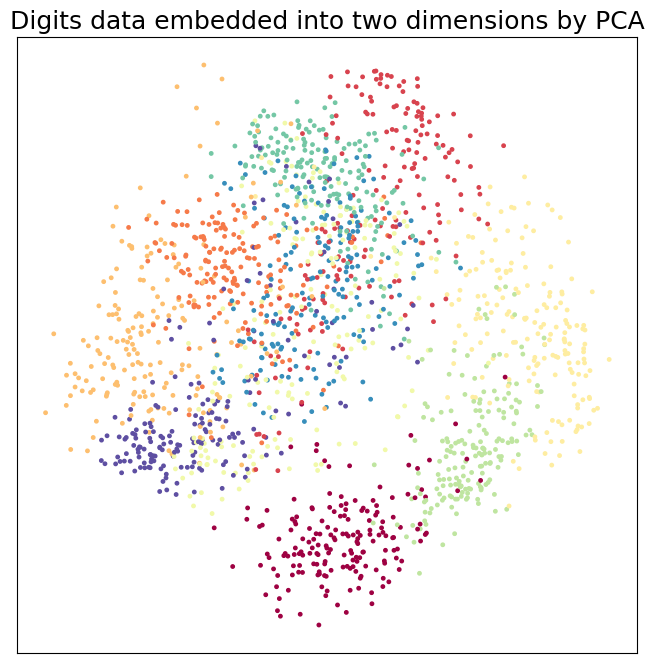

<Figure size 640x480 with 0 Axes>

In [1]:
def pca():

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn import datasets, decomposition
    from sklearn.datasets import load_digits

    digits = load_digits()

    X = digits.data
    y = digits.target

    pca = decomposition.PCA(n_components=2)
    principalComponents = pca.fit_transform(X)

    pca_data = np.vstack((principalComponents.T, y)).T
    pca_df = pd.DataFrame(
        data=pca_data, columns=("1st_principal", "2nd_principal", "label")
    )

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(
        pca_df["1st_principal"],
        pca_df["2nd_principal"],
        c=pca_df.label,
        cmap="Spectral",
        s=6,
    )
    plt.setp(ax, xticks=[], yticks=[])
    plt.title("Digits data embedded into two dimensions by PCA", fontsize=18)
    plt.show()
    plt.savefig("digits_pca.png")


pca()

/home/johanrobles/Documentos/Fundamentos de Analitica/taller24digits/2024-2-PRE-24-reduccion-de-la-dimensionalidad-digits-SrRobls/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


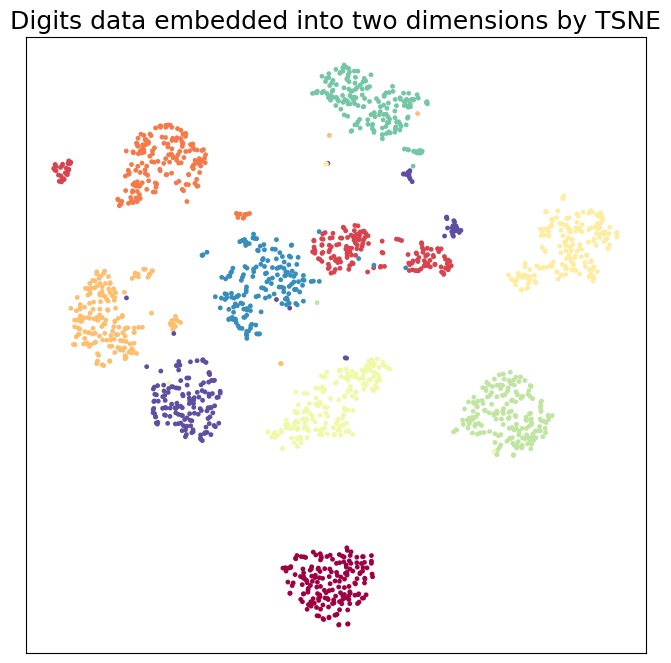

In [2]:
def tsne():

    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    import umap
    from sklearn import datasets, decomposition
    from sklearn.datasets import load_digits
    from sklearn.manifold import TSNE

    digits = load_digits()

    X = digits.data
    y = digits.target

    tsne = TSNE(n_components=2, random_state=0)
    embedding = tsne.fit_transform(X)

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap="Spectral", s=6)
    plt.setp(ax, xticks=[], yticks=[])
    plt.title("Digits data embedded into two dimensions by TSNE", fontsize=18)
    plt.savefig("digits_tsne.png")


tsne()

/home/johanrobles/Documentos/Fundamentos de Analitica/taller24digits/2024-2-PRE-24-reduccion-de-la-dimensionalidad-digits-SrRobls/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/johanrobles/Documentos/Fundamentos de Analitica/taller24digits/2024-2-PRE-24-reduccion-de-la-dimensionalidad-digits-SrRobls/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


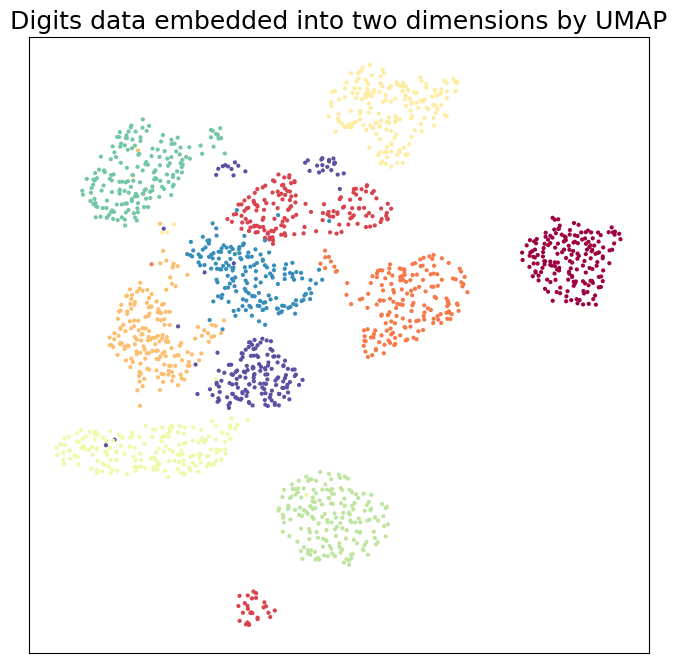

In [3]:
#
# Uniform Manifold Approximation and Projection (UMAP)
#
def umap():

    import matplotlib.pyplot as plt
    import numpy as np
    import umap
    from sklearn import datasets, decomposition
    from sklearn.datasets import load_digits

    digits = load_digits()

    X = digits.data
    y = digits.target

    reducer = umap.UMAP(random_state=42, min_dist=0.8)
    embedding = reducer.fit_transform(digits.data)

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap="Spectral", s=4)
    plt.setp(ax, xticks=[], yticks=[])
    plt.title("Digits data embedded into two dimensions by UMAP", fontsize=18)
    plt.savefig("digits_umap.png")


umap()